In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## RMI results analyzer and plotter

In [26]:
def analyze_csv(file_name):
    # Read the CSV file into a DataFrame
    # STILL NEED ERROR CHART plus print the rate
    df = pd.read_csv(file_name)

    # Remove the last two rows
    df = df.iloc[:-2]

    # Convert duration column to numeric
    df['duration'] = pd.to_numeric(df['duration'])

    # Add a new column as the row index
    df['row_index'] = range(1, len(df) + 1)

    # Visualization of thread execution time
    plt.figure(figsize=(10, 6))
    plt.plot(df['row_index'], df['duration'], marker='o', markersize=1)
    plt.title('Execution Time of Threads')
    plt.xlabel('Row Index')
    plt.ylabel('Time Taken (ms)')
    plt.grid(True)
    plt.show()

    # Barchart of thread counts in different time ranges
    plt.figure(figsize=(10, 6))
    bins = [0, 300, 600, 900, 2000, 10000, 50000, float('inf')]
    labels = ['0-300', '301-600', '601-900', '900-2000', '2000-10000', '10000-50000', '50000 plus']
    df['time_range'] = pd.cut(df['duration'], bins=bins, labels=labels, right=False)
    df['time_range'].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title('Thread Counts in Different Time Ranges')
    plt.xlabel('Time Range (ms)')
    plt.ylabel('Thread Count')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()

    # Print mean, median, and standard deviation
    print('Mean:', df['duration'].mean())
    print('Median:', df['duration'].median())
    print('Standard Deviation:', df['duration'].std())

    # Visualization of first quantile, third quantile, and outliers
    plt.figure(figsize=(10, 6))
    plt.boxplot(df['duration'], showfliers=True)
    plt.title('First Quantile, Third Quantile, and Outliers')
    plt.ylabel('Time Taken (ms)')
    plt.grid(True)
    plt.show()

### Test the plotter

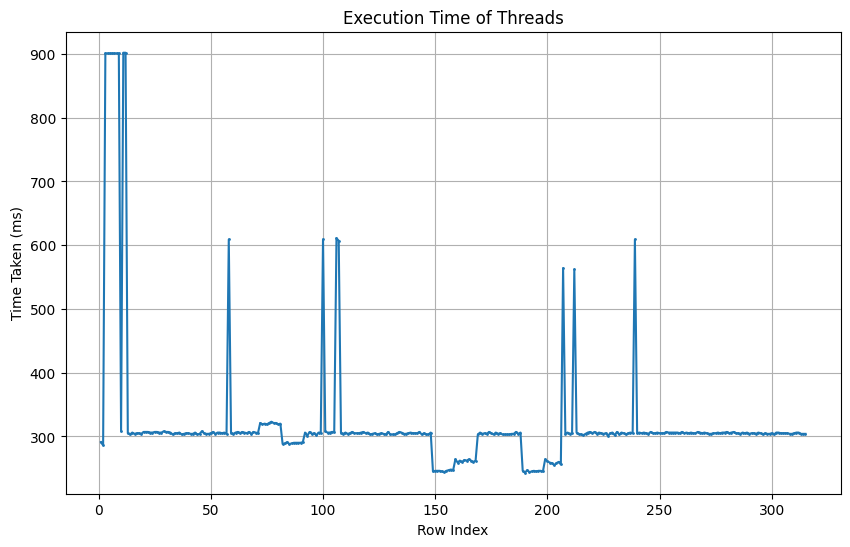

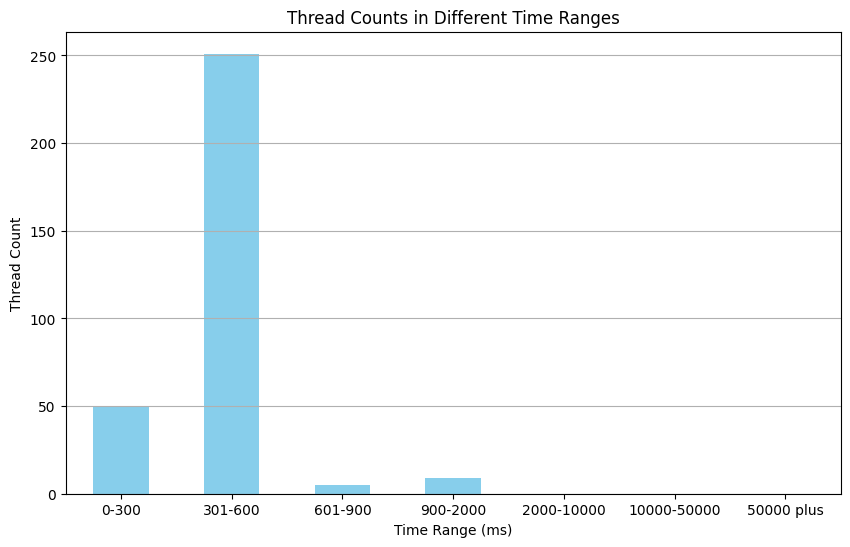

Mean: 322.1587301587302
Median: 305.0
Standard Deviation: 110.20811325706349


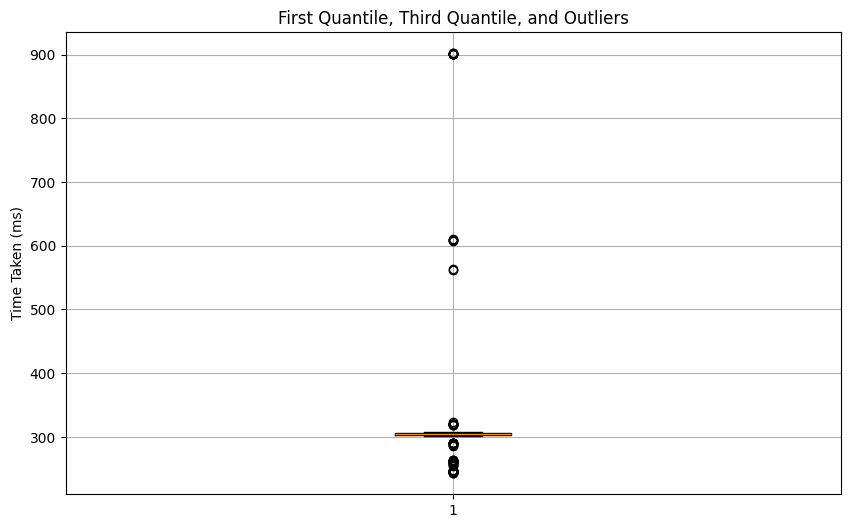

In [23]:
analyze_csv("output-test.csv")

### 2000 Threads, 2 minutes (in code, but actual time is about 3 mins), no timeout

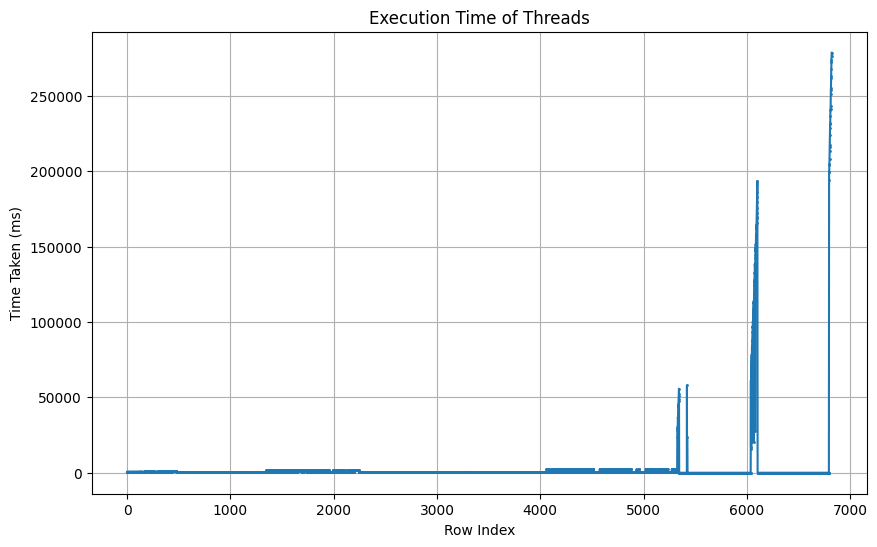

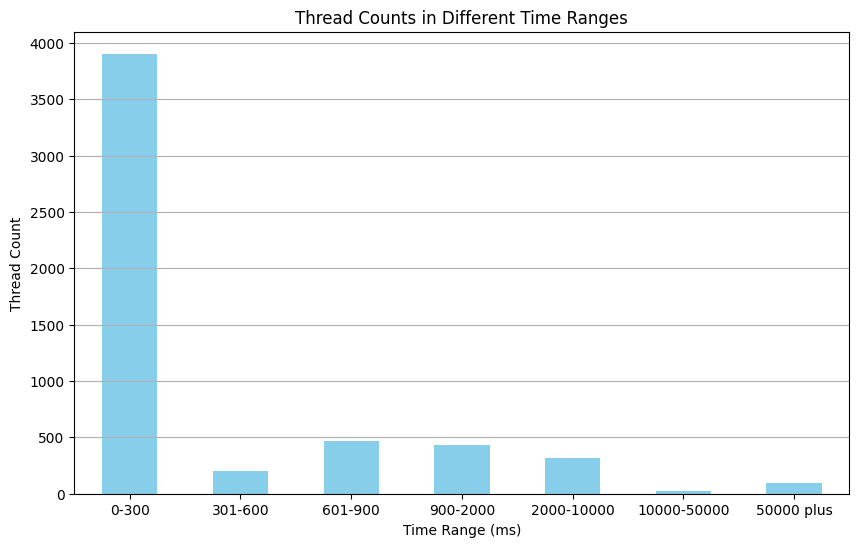

Mean: 2575.236622196159
Median: 245.0
Standard Deviation: 19235.481231430254


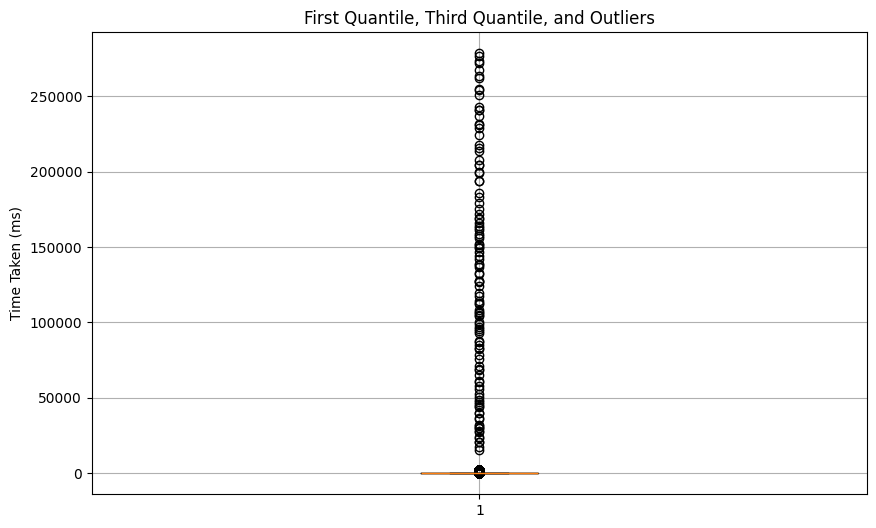

In [27]:
analyze_csv("output-2000thr-2min.csv")

### 2000 threads, 2 minutes in code, 60 seconds timeout